In [1]:
import pandas as pd

In [2]:
df_raw = pd.read_excel(r"C:\My Folder\Tuts\Python\Project\Project 5 - Industrial Copper Modeling\Copper_Set.xlsx")

In [3]:
df = df_raw.copy()

In [4]:
df.head(10)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
5,FE372230-29B1-4A29-BB73-CB9D3078C286,20210401.0,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,0000000000000000000000000000000000102325,1668701718,20210401.0,983.00
6,E1B47219-42C8-411D-AE46-AD5256DC4757,20210401.0,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,NBW_L+_A_1125_0.4,611993,20210701.0,18.00
7,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,20210401.0,113.387124,30342192.0,32.0,Won,W,41.0,0.68,1220.0,0000000000000000000000000000000001000944,611993,20210101.0,931.00
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,20210401.0,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,0000000000000000000000000000000000106786,1668701376,20210701.0,1363.00
9,6E4D638C-A820-4A40-836F-C9D48BC65528,20210401.0,630.626917,30202938.0,25.0,Won,W,41.0,1.50,1165.0,0000000000000000000000000000000000102325,1668701718,20210401.0,983.00


In [5]:
def dataframeinfo(df):
    data_types = df.dtypes.unique()
    
    max_length = max([len(col) for col in df.columns])
    if max_length > 13:
        max_length = max_length - 13
    else:
        max_length = 1
    print("Total rows: ", df.shape[0])
    print("Total rows: ", df.shape[1])
    print('')
    print(f"#      Column Name      {' ' * max_length} Non Null Count      Null Count      Non Null Percentage      Null Percentage      Data Type      Unique Values")
    print(f"--     -----------      {' ' * max_length} --------------      ----------      -------------------      ---------------      ---------      -------------")

    for i, value in enumerate(df.columns.tolist()):
        null_count = df[value].isnull().sum()
        non_null_Count = df.shape[0]-null_count
        non_null_percentage = (df.shape[0] - null_count) / df.shape[0]
        null_percentage = 1 - non_null_percentage
        data_type = str(df[value].dtype)
        unique_values = df[value].nunique()
        print(f'{i: <6} {value: <{17+max_length}} {non_null_Count: <19} {null_count: <15} {non_null_percentage: <24.2%} {null_percentage: <20.2%} {data_type: <14} {unique_values}')

    print("")
    print('--------------------------')
    print("Datatype Count:")
    for dtype in data_types:
        dtype_count = len(df.select_dtypes(include=[dtype]).columns)
        print(f" - {dtype}: {dtype_count}")

In [6]:
dataframeinfo(df)

Total rows:  181673
Total rows:  14

#      Column Name        Non Null Count      Null Count      Non Null Percentage      Null Percentage      Data Type      Unique Values
--     -----------        --------------      ----------      -------------------      ---------------      ---------      -------------
0      id                 181671              2               100.00%                  0.00%                object         181671
1      item_date          181672              1               100.00%                  0.00%                float64        252
2      quantity tons      181673              0               100.00%                  0.00%                object         181673
3      customer           181672              1               100.00%                  0.00%                float64        1169
4      country            181645              28              99.98%                   0.02%                float64        17
5      status             181671              2 

In [7]:
# We can exclude the 'id' column from the dataframe since it does not contribute significantly to the analysis
# We can exclude the 'material_ref' column from the dataframe since it contains 42.89% null values.

df.drop(columns = ['id', 'material_ref'], inplace = True)

In [8]:
df.columns = df.columns.str.replace(' ', '_')

In [9]:
df.columns.to_list()

['item_date',
 'quantity_tons',
 'customer',
 'country',
 'status',
 'item_type',
 'application',
 'thickness',
 'width',
 'product_ref',
 'delivery_date',
 'selling_price']

In [10]:
# df['item_date1'] = pd.to_datetime(df['item_date'], format = "%Y%m%d", errors= "coerce").dt.date
# df['quantity_tons'] = pd.to_numeric(df['quantity_tons'], errors = "coerce")
# df['customer'] = pd.to_numeric(df['customer'], errors = "coerce")
# df['country'] = pd.to_numeric(df['country'], errors = "coerce")
# df['application'] = pd.to_numeric(df['application'], errors = "coerce")
# df['thickness'] = pd.to_numeric(df['thickness'], errors = "coerce")
# df['width'] = pd.to_numeric(df['width'], errors = "coerce")
# df['product_ref'] = pd.to_numeric(df['product_ref'], errors = "coerce")
# df['delivery_date1'] = pd.to_datetime(df['delivery_date'], format = "%Y%m%d", errors = "coerce").dt.date
# df['selling_price'] = pd.to_numeric(df['selling_price'], errors = "coerce")


columns = ['item_date', 'quantity_tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref', 'delivery_date', 'selling_price']

for column in columns:
    if 'date' in column:
        df[column + "1"] = pd.to_datetime(df[column], format = "%Y%m%d", errors = "coerce").dt.date
        print(f'{column} is converted to datetime')
    else:
        df[column] = pd.to_numeric(df[column], errors = "coerce")
        print(f'{column} is converted to numeric')
else:
    print('Conversions Completed Successfully')

item_date is converted to datetime
quantity_tons is converted to numeric
customer is converted to numeric
country is converted to numeric
application is converted to numeric
thickness is converted to numeric
width is converted to numeric
product_ref is converted to numeric
delivery_date is converted to datetime
selling_price is converted to numeric
Conversions Completed Successfully


In [11]:
dataframeinfo(df)

Total rows:  181673
Total rows:  14

#      Column Name        Non Null Count      Null Count      Non Null Percentage      Null Percentage      Data Type      Unique Values
--     -----------        --------------      ----------      -------------------      ---------------      ---------      -------------
0      item_date          181672              1               100.00%                  0.00%                float64        252
1      quantity_tons      181672              1               100.00%                  0.00%                float64        181672
2      customer           181672              1               100.00%                  0.00%                float64        1169
3      country            181645              28              99.98%                   0.02%                float64        17
4      status             181671              2               100.00%                  0.00%                object         9
5      item_type          181673              0      

In [12]:
df[['item_date1','delivery_date1']]

,item_date1,delivery_date1
0,2021-04-01,2021-07-01
1,2021-04-01,2021-04-01
2,2021-04-01,2021-01-01
3,2021-04-01,2021-01-01
4,2021-04-01,2021-03-01
...,...,...
181668,2020-07-02,2020-07-01
181669,2020-07-02,2020-07-01
181670,2020-07-02,2020-07-01
181671,2020-07-02,2020-07-01


## Remove records other than Status as WON or LOST


In [13]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [14]:
df1 = df.copy()

In [15]:
df1 = df1[df1['status'].isin(["Won", "Lost"])]
df1.reset_index(drop=True, inplace=True)

In [16]:
df1['status'].unique()

array(['Won', 'Lost'], dtype=object)

## Dealing with Null Values


In [17]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,150447.0,2.020457e+07,4.553500e+03,19950000.00,2.020093e+07,2.020120e+07,2.021020e+07,2.021040e+07
quantity_tons,150447.0,9.445873e+01,4.409473e+02,-2000.00,1.069873e+01,2.993464e+01,6.486820e+01,7.025236e+04
customer,150447.0,3.027510e+07,9.455083e+06,12458.00,3.019689e+07,3.020531e+07,3.027982e+07,2.147484e+09
country,150444.0,4.539109e+01,2.448819e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,150445.0,2.519511e+01,1.764029e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,150448.0,2.618359e+00,7.115448e+00,0.18,7.400000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,150448.0,1.297840e+03,2.661565e+02,1.00,1.176000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,150448.0,4.748400e+08,7.172630e+08,611728.00,6.283770e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery_date,150447.0,2.020729e+07,4.427745e+03,20190401.00,2.020100e+07,2.021010e+07,2.021040e+07,2.022010e+07
selling_price,150447.0,8.257639e+02,2.908797e+02,-1160.00,6.710000e+02,8.110000e+02,9.510000e+02,8.123614e+04


quantity_tons and selling_price columns have -ve values which will impact our analysis. Therefore it is best to null the -ve values

In [18]:
import numpy as np
df1['quantity_tons'] = df1['quantity_tons'].apply(lambda x: np.nan if x<=0 else x)
df1['selling_price'] = df1['selling_price'].apply(lambda x: np.nan if x<=0 else x)

In [19]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,150447.0,2.020457e+07,4.553500e+03,1.995000e+07,2.020093e+07,2.020120e+07,2.021020e+07,2.021040e+07
quantity_tons,150444.0,9.447406e+01,4.409184e+02,1.000000e-05,1.069997e+01,2.993481e+01,6.487005e+01,7.025236e+04
customer,150447.0,3.027510e+07,9.455083e+06,1.245800e+04,3.019689e+07,3.020531e+07,3.027982e+07,2.147484e+09
country,150444.0,4.539109e+01,2.448819e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,150445.0,2.519511e+01,1.764029e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,150448.0,2.618359e+00,7.115448e+00,1.800000e-01,7.400000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,150448.0,1.297840e+03,2.661565e+02,1.000000e+00,1.176000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,150448.0,4.748400e+08,7.172630e+08,6.117280e+05,6.283770e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery_date,150447.0,2.020729e+07,4.427745e+03,2.019040e+07,2.020100e+07,2.021010e+07,2.021040e+07,2.022010e+07
selling_price,150442.0,8.258091e+02,2.907701e+02,1.000000e-01,6.710000e+02,8.110000e+02,9.510000e+02,8.123614e+04


In [20]:
df1.drop(columns = ['item_date','delivery_date'], inplace = True)

In [21]:
# filling missing values with median and mode
# if the datatype is object then fill with mode, else median

columns = df1.columns.to_list()
for col in columns:
    if df1[col].isnull().any():
        if df1[col].dtype == 'object':
            df1[col].fillna(df1[col].mode().iloc[0],inplace=True)
        else:
            df1[col].fillna(df1[col].median(), inplace=True)

In [22]:
dataframeinfo(df1)

Total rows:  150448
Total rows:  12

#      Column Name        Non Null Count      Null Count      Non Null Percentage      Null Percentage      Data Type      Unique Values
--     -----------        --------------      ----------      -------------------      ---------------      ---------      -------------
0      quantity_tons      150448              0               100.00%                  0.00%                float64        150445
1      customer           150448              0               100.00%                  0.00%                float64        1124
2      country            150448              0               100.00%                  0.00%                float64        17
3      status             150448              0               100.00%                  0.00%                object         2
4      item_type          150448              0               100.00%                  0.00%                object         7
5      application        150448              0        

In [23]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity_tons,150448.0,9.447234e+01,4.409127e+02,0.00001,1.070011e+01,2.993481e+01,6.486744e+01,7.025236e+04
customer,150448.0,3.027510e+07,9.455052e+06,12458.00000,3.019689e+07,3.020531e+07,3.027982e+07,2.147484e+09
country,150448.0,4.539068e+01,2.448800e+01,25.00000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,150448.0,2.519490e+01,1.764017e+01,2.00000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,150448.0,2.618359e+00,7.115448e+00,0.18000,7.400000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,150448.0,1.297840e+03,2.661565e+02,1.00000,1.176000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,150448.0,4.748400e+08,7.172630e+08,611728.00000,6.283770e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,150448.0,8.258085e+02,2.907644e+02,0.10000,6.710000e+02,8.110000e+02,9.510000e+02,8.123614e+04


In [ ]:
# we have now cleaned the dataset by handling missing values, -ve values, datatypes
# let us now convert the categorical data to numerical data by encoding technique

Pie Chart for Status column


<Axes: ylabel='count'>

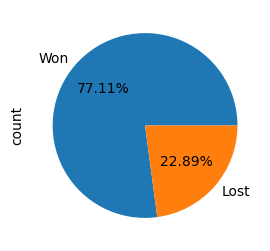

In [24]:
# univariate analysis
# Status column
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3,3))
print('Pie Chart for Status column')
df1['status'].value_counts().plot.pie(autopct = '%1.2f%%')

Count Plot for Item_Type
item_type
W         61.121451
S         34.872514
PL         3.344677
WI         0.334999
Others     0.307748
IPL        0.017946
SLAWR      0.000665
Name: count, dtype: float64


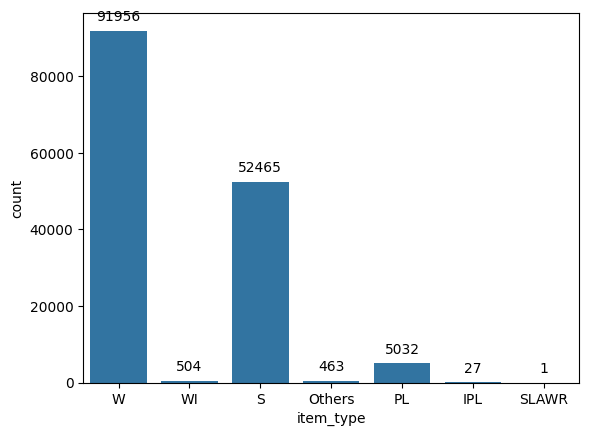

In [25]:

import seaborn as sns
ax = sns.countplot(x="item_type", data=df1)
print('Count Plot for Item_Type')
percentage = (df1['item_type'].value_counts() / df1.shape[0]) * 100
print(f"{percentage}")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')
plt.show()

Skewness of the column thickness is : 288.70802917201587


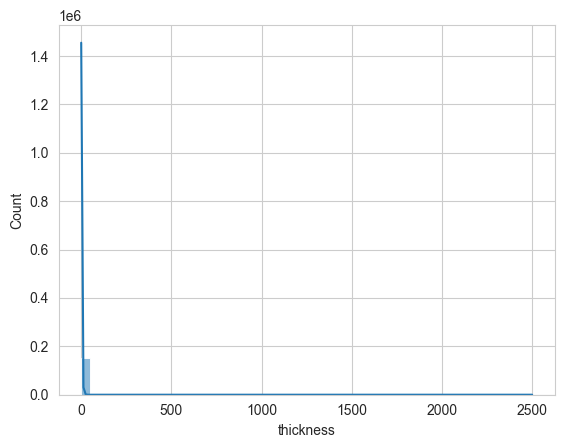

In [26]:
sns.set_style('whitegrid')
sns.histplot(df1['thickness'], kde = True, bins = 50)
skewness = df1['thickness'].skew()
print('Skewness of the column thickness is :', skewness)
plt.show()

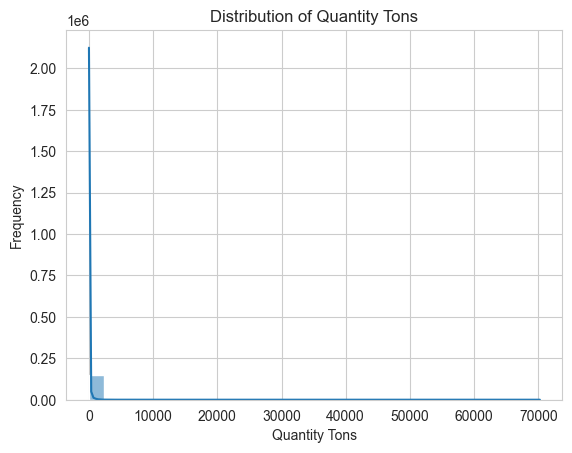

In [27]:
sns.histplot(df1['quantity_tons'], bins=30, kde=True)
plt.title('Distribution of Quantity Tons')
plt.xlabel('Quantity Tons')
plt.ylabel('Frequency')
plt.show()

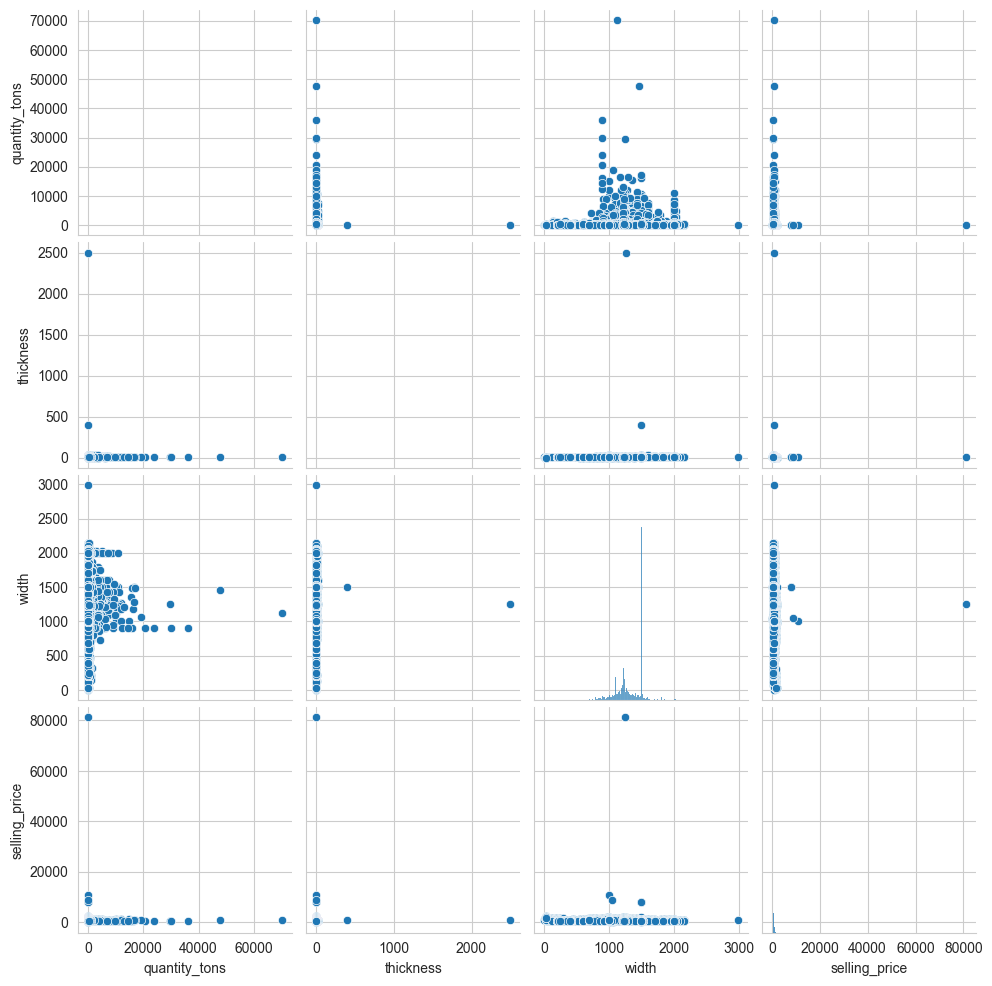

In [28]:
# Use pairplot for pairwise relationships between numerical variables
sns.pairplot(df1[['quantity_tons', 'thickness', 'width', 'selling_price']])
plt.show()

# # Calculate and visualize correlation matrix
# corr_matrix = df1.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

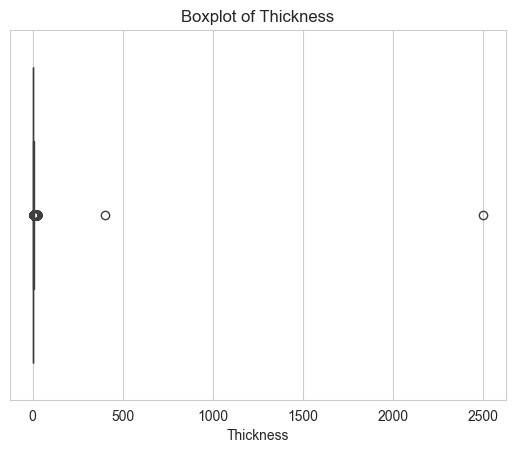

In [31]:
# # Visualize outliers using boxplots
# sns.boxplot(x='thickness', data=df1)
# plt.title('Boxplot of Thickness')
# plt.xlabel('Thickness')
# plt.show()

# # Detect and handle outliers using IQR method
# Q1 = df1['thickness'].quantile(0.25)
# Q3 = df1['thickness'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# outliers = df1[(df1['thickness'] < lower_bound) | (df1['thickness'] > upper_bound)]


In [29]:
numerical_columns = ['quantity_tons', 'thickness', 'width', 'product_ref', 'selling_price']

# Calculating skewness for each numerical column
skewness = df1[numerical_columns].skew()

# Printing skewness for each column
print("Skewness of numerical columns:")
for column, skew in skewness.items():
    print(f"{column}: {skew}")

Skewness of numerical columns:
quantity_tons: 53.804750973705765
thickness: 288.70802917201587
width: 0.3527508508617413
product_ref: 1.0134598112682567
selling_price: 141.49937878635768


In [30]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

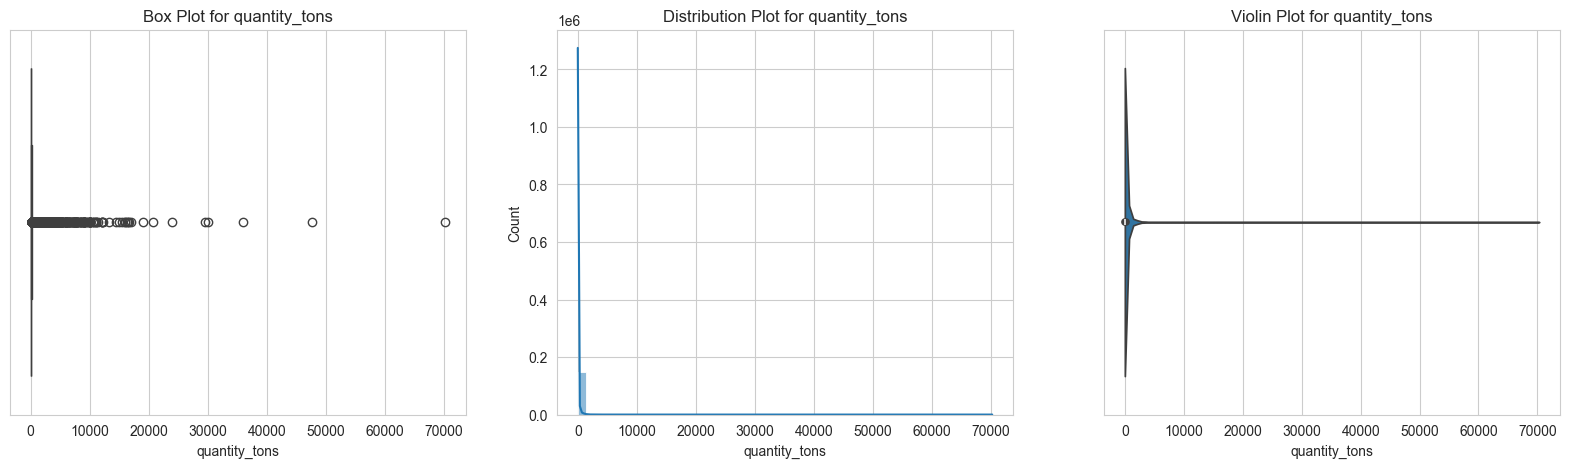

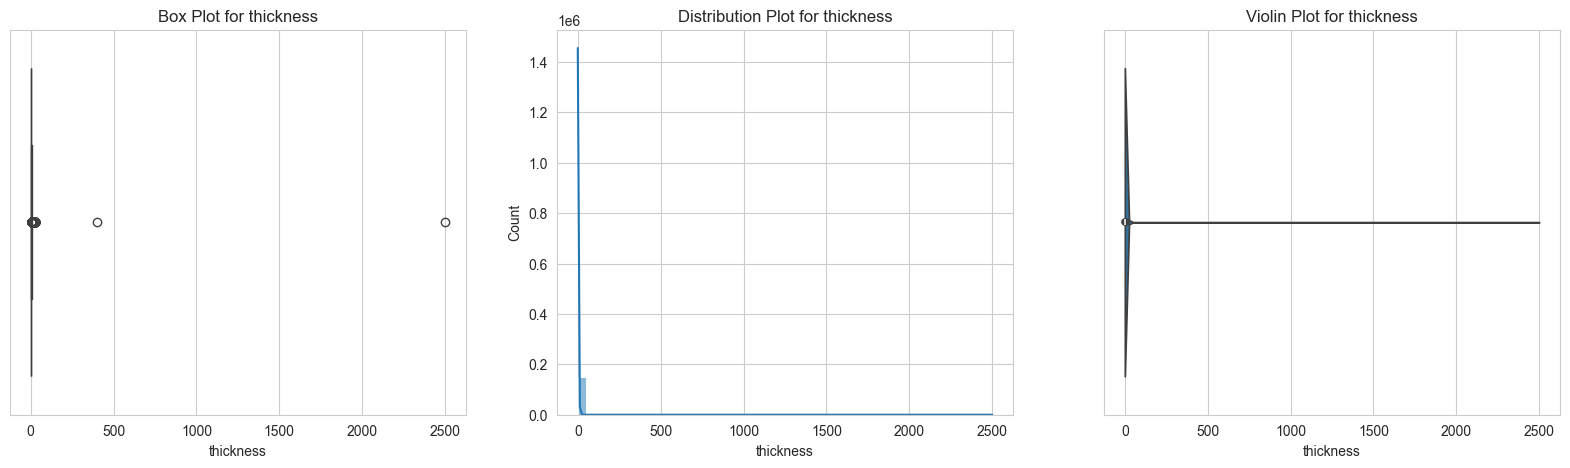

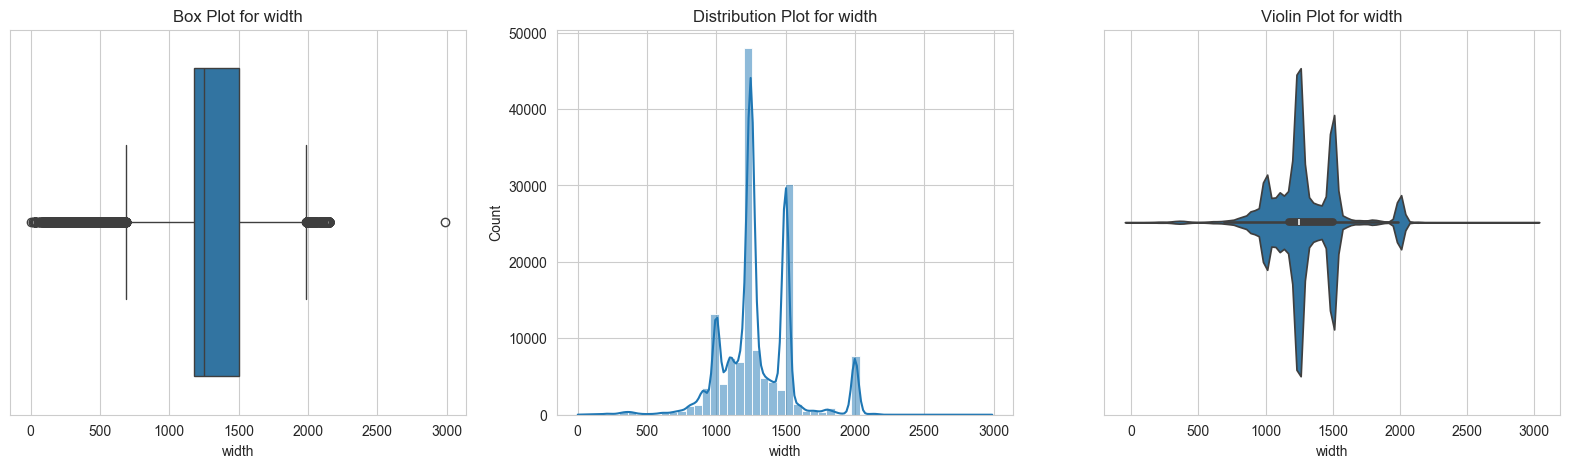

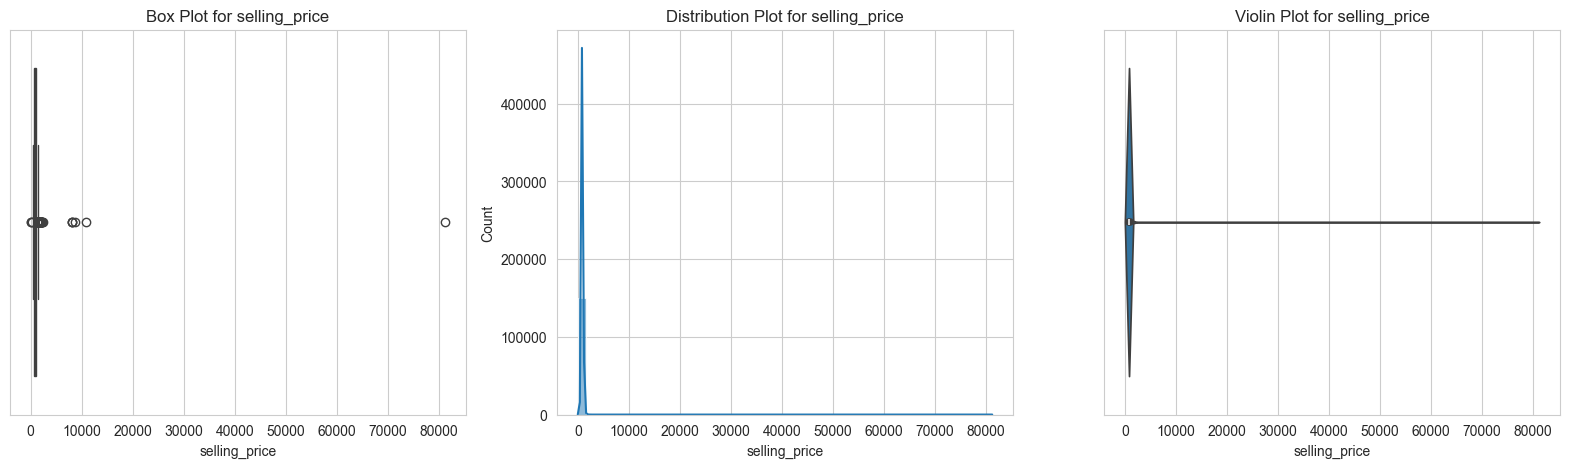

In [31]:
for i in ['quantity_tons', 'thickness', 'width', 'selling_price']:
    plot(df1, i)

In [32]:
columns_to_transform = ['quantity_tons', 'thickness', 'product_ref', 'selling_price']
for column in columns_to_transform:
    df1[column] = np.log1p(df1[column])

# Check skewness after transformation
skewness_after_transformation = df1[columns_to_transform].skew()
print("Skewness after transformation:")
print(skewness_after_transformation)

Skewness after transformation:
quantity_tons    0.352506
thickness        0.837973
product_ref      0.368400
selling_price   -0.105275
dtype: float64


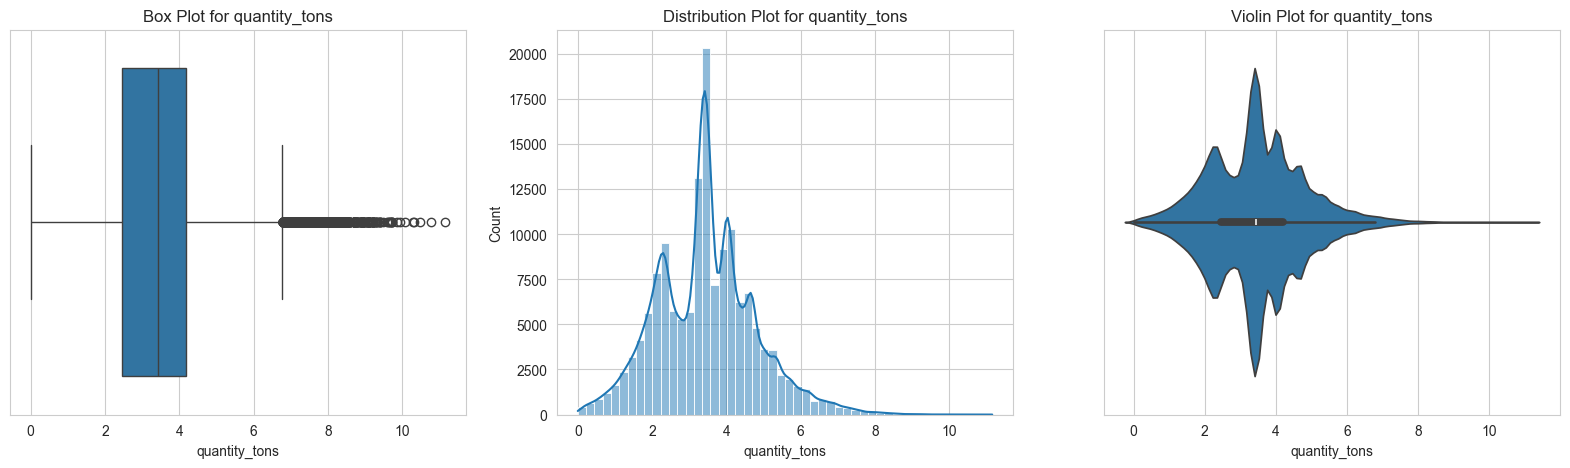

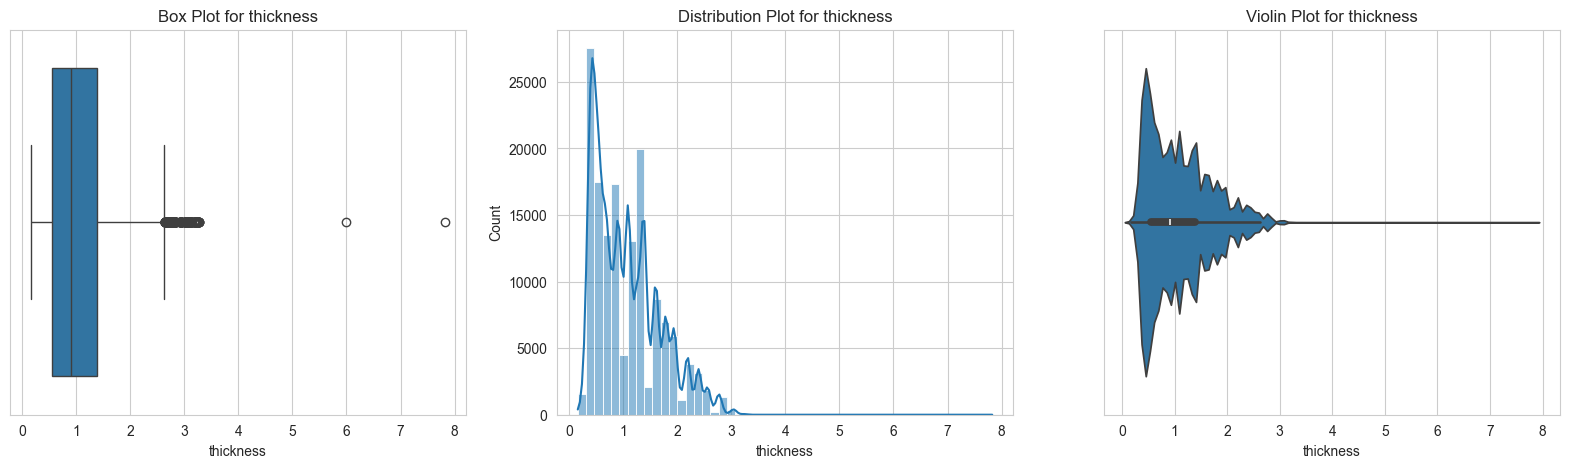

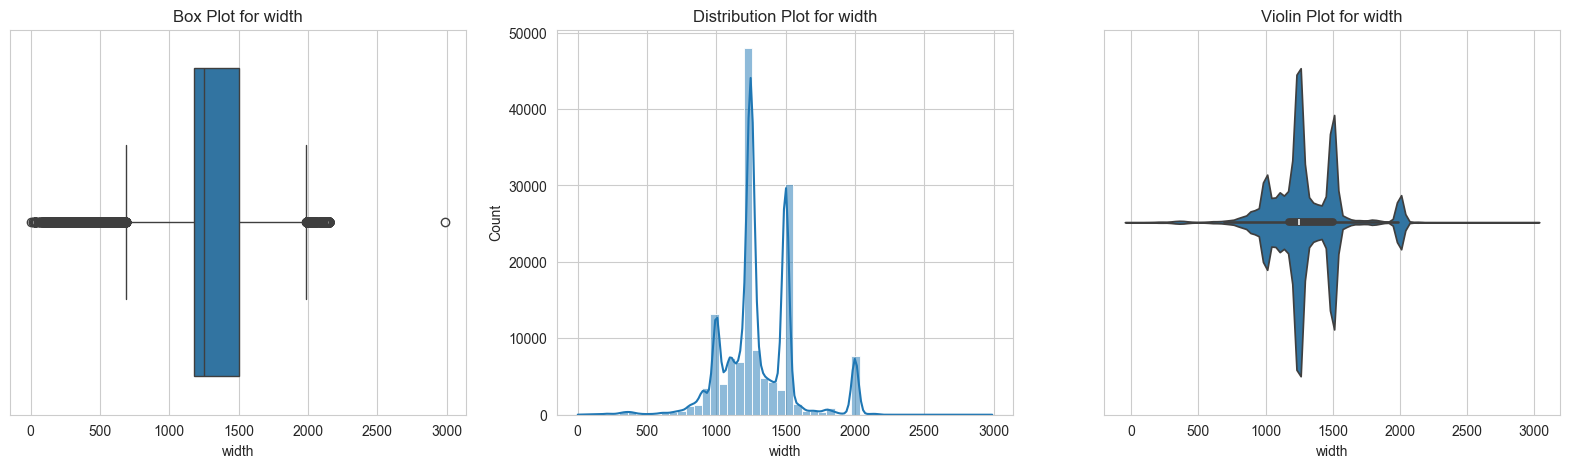

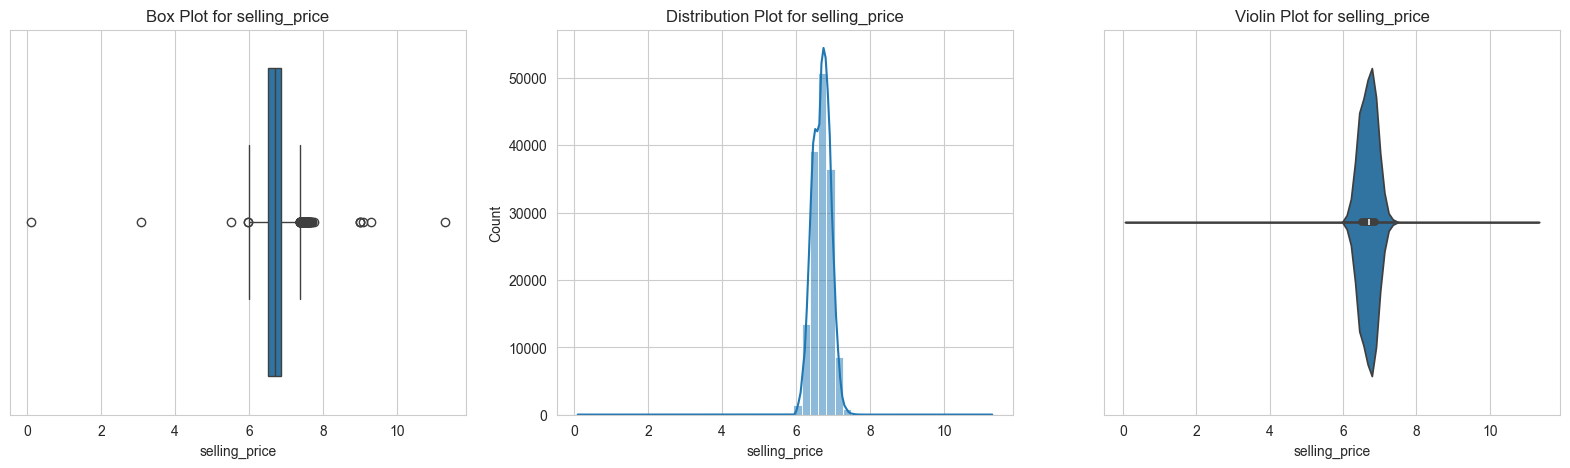

In [33]:
for i in ['quantity_tons', 'thickness', 'width', 'selling_price']:
    plot(df1, i)

Skewness of 'quantity_tons' before handling outliers: 0.3525055268832069
Skewness of 'quantity_tons' after handling outliers: 0.19342744242751891



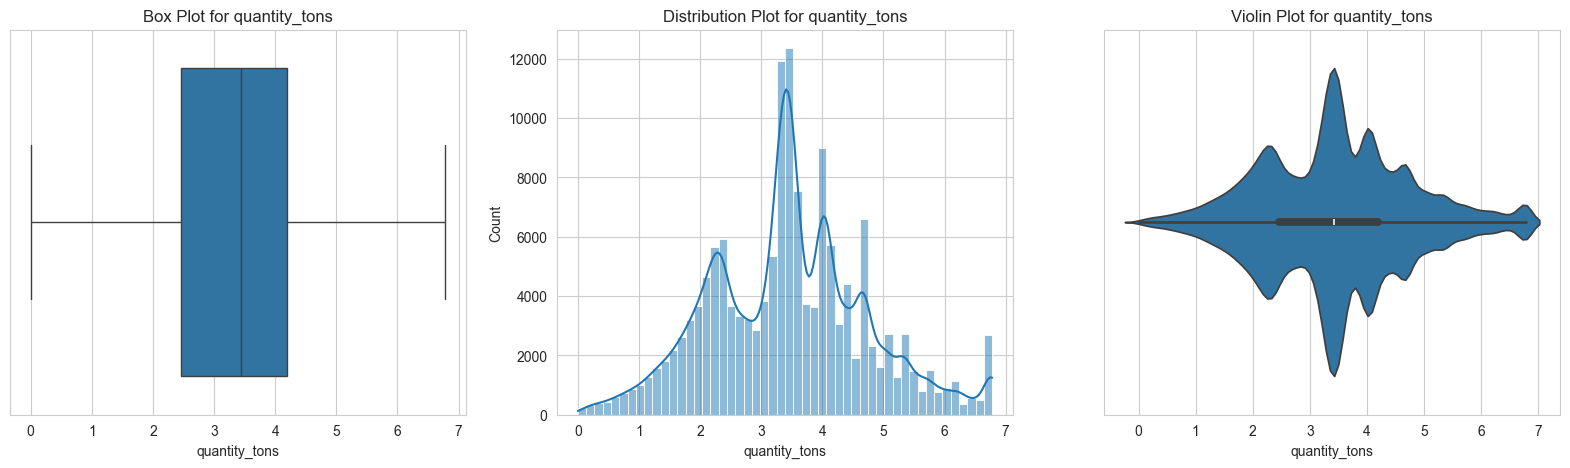

Skewness of 'thickness' before handling outliers: 0.8379726344785086
Skewness of 'thickness' after handling outliers: 0.7623133550827493



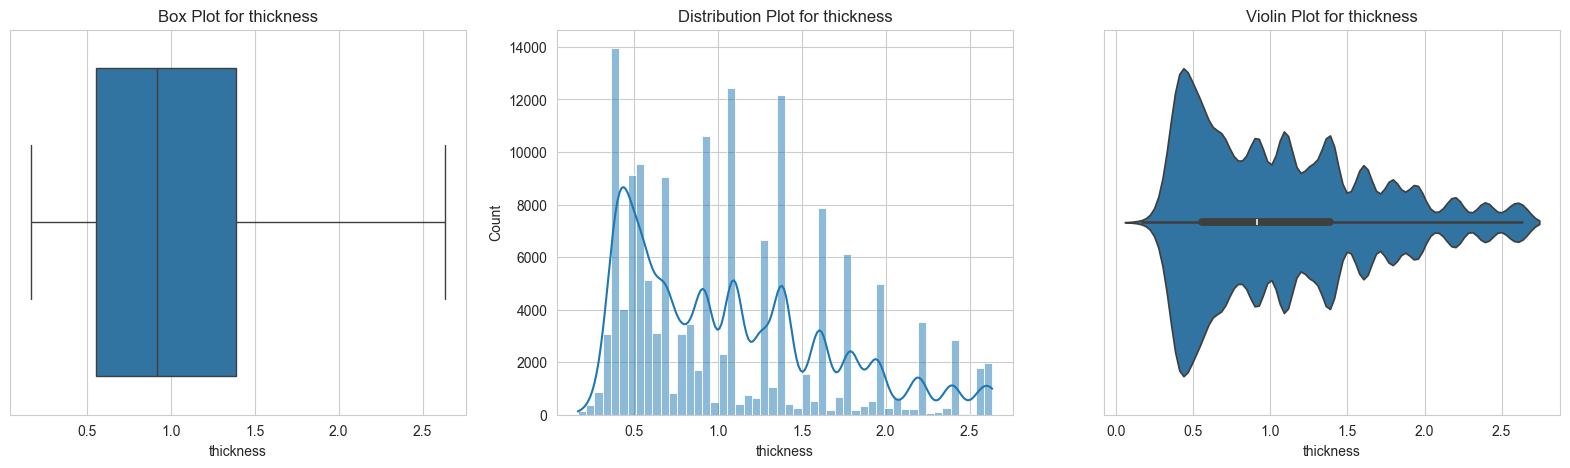

Skewness of 'selling_price' before handling outliers: -0.10527495836316966
Skewness of 'selling_price' after handling outliers: -0.03814220915070664



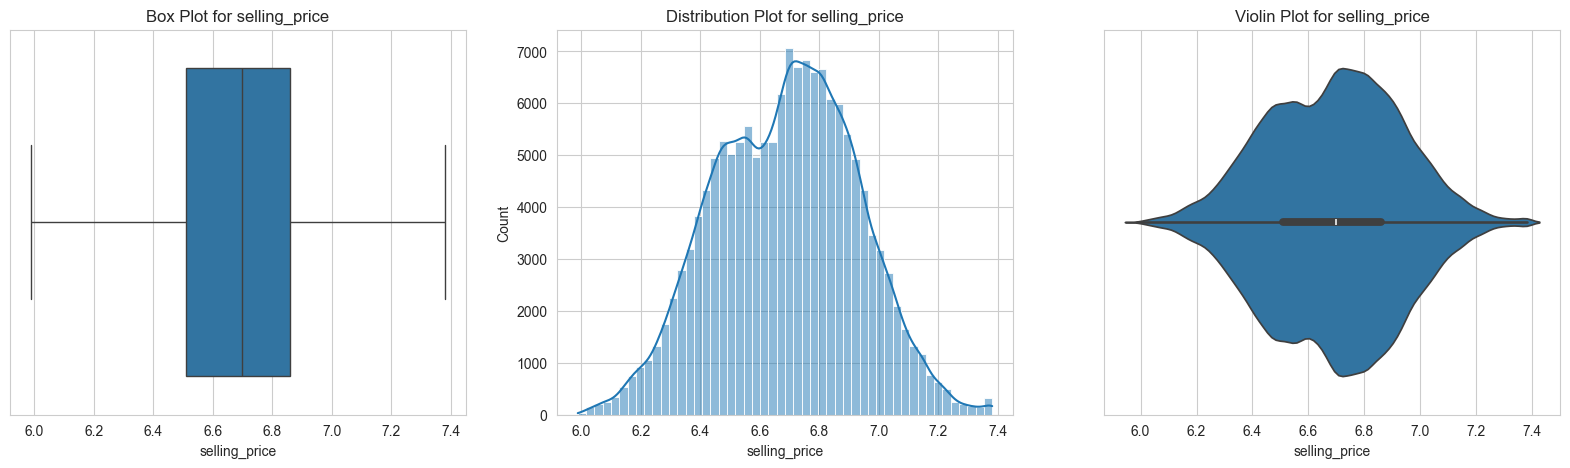

In [34]:
df2 = df1.copy()
numerical_columns = ['quantity_tons', 'thickness', 'selling_price']


# Using IQR and clip() methods to handle the outliers

def outlier(df, column):
    skewness_before = df[column].skew()
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    skewness_after = df[column].skew()
    
    print(f"Skewness of '{column}' before handling outliers: {skewness_before}")
    print(f"Skewness of '{column}' after handling outliers: {skewness_after}")
    print()

    
for col in numerical_columns:
    outlier(df2, col)
    plot(df2, col)

In [35]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity_tons,150448.0,3.446737e+00,1.298711e+00,0.000010,2.459598e+00,3.431882e+00,4.187644e+00,6.779713e+00
customer,150448.0,3.027510e+07,9.455052e+06,12458.000000,3.019689e+07,3.020531e+07,3.027982e+07,2.147484e+09
country,150448.0,4.539068e+01,2.448800e+01,25.000000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,150448.0,2.519490e+01,1.764017e+01,2.000000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,150448.0,1.068617e+00,5.945983e-01,0.165514,5.538851e-01,9.162907e-01,1.386294e+00,2.634908e+00
width,150448.0,1.297840e+03,2.661565e+02,1.000000,1.176000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,150448.0,1.641714e+01,3.551545e+00,13.324045,1.335090e+01,1.337026e+01,2.101001e+01,2.126687e+01
selling_price,150448.0,6.688116e+00,2.384572e-01,5.987798,6.510258e+00,6.699500e+00,6.858565e+00,7.381025e+00


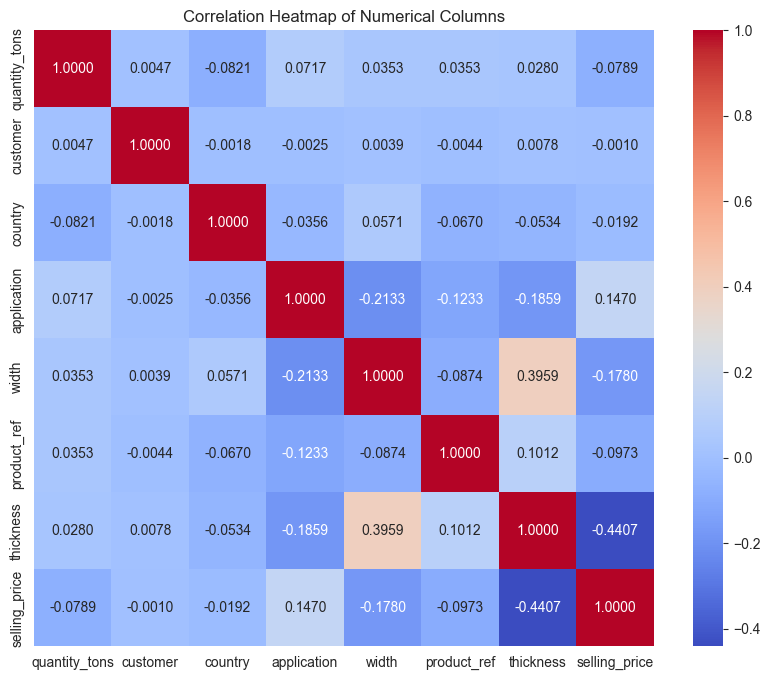

In [36]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

col = ['quantity_tons','customer','country', 'application', 'width', 'product_ref', 'thickness','selling_price']
df2_heatmap = df2[col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df2_heatmap, annot=True, cmap = 'coolwarm', fmt = ".4f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [37]:
# using Mapping and one-hot encoding convert categorical to numerical

df_encoded = pd.get_dummies(df2, columns = ['item_type'])
df_encoded['status'] = df_encoded['status'].map({'Lost':0, 'Won':1})

In [38]:
df_encoded['status'].unique()

array([1, 0], dtype=int64)

In [39]:
df_encoded

,quantity_tons,customer,country,status,application,thickness,width,product_ref,selling_price,item_date1,delivery_date1,item_type_IPL,item_type_Others,item_type_PL,item_type_S,item_type_SLAWR,item_type_W,item_type_WI
0,4.010077,30156308.0,28.0,1,10.0,1.098612,1500.0,21.236568,6.751101,2021-04-01,2021-07-01,False,False,False,False,False,True,False
1,6.645123,30202938.0,25.0,1,41.0,0.587787,1210.0,21.235312,6.954639,2021-04-01,2021-04-01,False,False,False,False,False,True,False
2,5.958755,30153963.0,30.0,1,28.0,0.322083,952.0,13.350897,6.469762,2021-04-01,2021-01-01,False,False,False,False,False,False,True
3,5.315229,30349574.0,32.0,1,59.0,1.193922,1317.0,21.235312,6.645091,2021-04-01,2021-01-01,False,False,False,True,False,False,False
4,6.667626,30211560.0,28.0,1,10.0,1.609438,2000.0,13.370264,6.359574,2021-04-01,2021-03-01,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,4.639402,30200854.0,25.0,1,41.0,0.672944,1220.0,18.916240,6.383507,2020-07-02,2020-07-01,False,False,False,False,False,True,False
150444,5.342748,30200854.0,25.0,1,41.0,0.667829,1500.0,18.916240,6.380123,2020-07-02,2020-07-01,False,False,False,False,False,True,False
150445,1.655480,30200854.0,25.0,1,41.0,0.536493,1250.0,18.916240,6.429719,2020-07-02,2020-07-01,False,False,False,False,False,True,False
150446,3.431882,30200854.0,25.0,1,41.0,0.615186,1250.0,18.916240,6.400257,2020-07-02,2020-07-01,False,False,False,False,False,True,False


In [40]:
# df_encoded['Ageing'] = (df_encoded['delivery_date1'] - df_encoded['item_date1']).dt.days

# df_encoded[['delivery_date1','item_date1']]


# Convert 'delivery_date1' and 'item_date1' columns to datetime type
df_encoded['delivery_date1'] = pd.to_datetime(df_encoded['delivery_date1'])
df_encoded['item_date1'] = pd.to_datetime(df_encoded['item_date1'])

# Calculate the difference in days between 'delivery_date1' and 'item_date1'
df_encoded['Ageing'] = (df_encoded['delivery_date1'] - df_encoded['item_date1']).dt.days



In [41]:
df_encoded

,quantity_tons,customer,country,status,application,thickness,width,product_ref,selling_price,item_date1,delivery_date1,item_type_IPL,item_type_Others,item_type_PL,item_type_S,item_type_SLAWR,item_type_W,item_type_WI,Ageing
0,4.010077,30156308.0,28.0,1,10.0,1.098612,1500.0,21.236568,6.751101,2021-04-01,2021-07-01,False,False,False,False,False,True,False,91
1,6.645123,30202938.0,25.0,1,41.0,0.587787,1210.0,21.235312,6.954639,2021-04-01,2021-04-01,False,False,False,False,False,True,False,0
2,5.958755,30153963.0,30.0,1,28.0,0.322083,952.0,13.350897,6.469762,2021-04-01,2021-01-01,False,False,False,False,False,False,True,-90
3,5.315229,30349574.0,32.0,1,59.0,1.193922,1317.0,21.235312,6.645091,2021-04-01,2021-01-01,False,False,False,True,False,False,False,-90
4,6.667626,30211560.0,28.0,1,10.0,1.609438,2000.0,13.370264,6.359574,2021-04-01,2021-03-01,False,False,False,False,False,True,False,-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,4.639402,30200854.0,25.0,1,41.0,0.672944,1220.0,18.916240,6.383507,2020-07-02,2020-07-01,False,False,False,False,False,True,False,-1
150444,5.342748,30200854.0,25.0,1,41.0,0.667829,1500.0,18.916240,6.380123,2020-07-02,2020-07-01,False,False,False,False,False,True,False,-1
150445,1.655480,30200854.0,25.0,1,41.0,0.536493,1250.0,18.916240,6.429719,2020-07-02,2020-07-01,False,False,False,False,False,True,False,-1
150446,3.431882,30200854.0,25.0,1,41.0,0.615186,1250.0,18.916240,6.400257,2020-07-02,2020-07-01,False,False,False,False,False,True,False,-1


In [42]:
# feature engineering

# split the day, month, and year from 'item_date1' column and add dataframe (This data also help us to prediction)
df_encoded['item_date_day'] = df_encoded['item_date1'].dt.day
df_encoded['item_date_month'] = df_encoded['item_date1'].dt.month
df_encoded['item_date_year'] = df_encoded['item_date1'].dt.year
df_encoded

,quantity_tons,customer,country,status,application,thickness,width,product_ref,selling_price,item_date1,...,item_type_Others,item_type_PL,item_type_S,item_type_SLAWR,item_type_W,item_type_WI,Ageing,item_date_day,item_date_month,item_date_year
0,4.010077,30156308.0,28.0,1,10.0,1.098612,1500.0,21.236568,6.751101,2021-04-01,...,False,False,False,False,True,False,91,1,4,2021
1,6.645123,30202938.0,25.0,1,41.0,0.587787,1210.0,21.235312,6.954639,2021-04-01,...,False,False,False,False,True,False,0,1,4,2021
2,5.958755,30153963.0,30.0,1,28.0,0.322083,952.0,13.350897,6.469762,2021-04-01,...,False,False,False,False,False,True,-90,1,4,2021
3,5.315229,30349574.0,32.0,1,59.0,1.193922,1317.0,21.235312,6.645091,2021-04-01,...,False,False,True,False,False,False,-90,1,4,2021
4,6.667626,30211560.0,28.0,1,10.0,1.609438,2000.0,13.370264,6.359574,2021-04-01,...,False,False,False,False,True,False,-31,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,4.639402,30200854.0,25.0,1,41.0,0.672944,1220.0,18.916240,6.383507,2020-07-02,...,False,False,False,False,True,False,-1,2,7,2020
150444,5.342748,30200854.0,25.0,1,41.0,0.667829,1500.0,18.916240,6.380123,2020-07-02,...,False,False,False,False,True,False,-1,2,7,2020
150445,1.655480,30200854.0,25.0,1,41.0,0.536493,1250.0,18.916240,6.429719,2020-07-02,...,False,False,False,False,True,False,-1,2,7,2020
150446,3.431882,30200854.0,25.0,1,41.0,0.615186,1250.0,18.916240,6.400257,2020-07-02,...,False,False,False,False,True,False,-1,2,7,2020


In [43]:
# split the non-negative value of 'Date_difference' column in separate dataframe
df_f1 = df_encoded[df_encoded['Ageing']>=0]

# after split, the index values are unordered. so need to reset the index to ascending order from 0
df_f1 = df_f1.reset_index(drop=True)
df_f1

,quantity_tons,customer,country,status,application,thickness,width,product_ref,selling_price,item_date1,...,item_type_Others,item_type_PL,item_type_S,item_type_SLAWR,item_type_W,item_type_WI,Ageing,item_date_day,item_date_month,item_date_year
0,4.010077,30156308.0,28.0,1,10.0,1.098612,1500.0,21.236568,6.751101,2021-04-01,...,False,False,False,False,True,False,91,1,4,2021
1,6.645123,30202938.0,25.0,1,41.0,0.587787,1210.0,21.235312,6.954639,2021-04-01,...,False,False,False,False,True,False,0,1,4,2021
2,5.424027,30202938.0,25.0,1,41.0,0.916291,1265.0,21.235312,6.891626,2021-04-01,...,False,False,False,False,True,False,0,1,4,2021
3,4.249521,30341428.0,38.0,1,10.0,0.470004,1275.0,21.235312,7.218177,2021-04-01,...,False,False,True,False,False,False,91,1,4,2021
4,6.448299,30202938.0,25.0,1,41.0,0.916291,1165.0,21.235312,6.891626,2021-04-01,...,False,False,False,False,True,False,0,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135787,3.503035,30227718.0,25.0,0,15.0,1.945910,2000.0,13.370264,6.315358,2020-07-02,...,False,False,True,False,False,False,30,2,7,2020
135788,4.211112,30161559.0,30.0,0,10.0,1.578979,1525.0,13.370264,6.129050,2020-07-02,...,False,False,True,False,False,False,30,2,7,2020
135789,4.172224,30161559.0,30.0,0,10.0,1.924249,1525.0,13.370264,6.126869,2020-07-02,...,False,False,True,False,False,False,30,2,7,2020
135790,4.043552,30161559.0,30.0,0,10.0,2.180417,1500.0,13.370264,6.129050,2020-07-02,...,False,False,True,False,False,False,30,2,7,2020


In [44]:
# split the negative value of 'Date_difference' column in another dataframe
df_f2 = df_encoded[df_encoded['Ageing']<0]

# after split, the index values are unordered. so need to reset the index to ascending order from 0
df_f2 = df_f2.reset_index(drop=True)
df_f2

,quantity_tons,customer,country,status,application,thickness,width,product_ref,selling_price,item_date1,...,item_type_Others,item_type_PL,item_type_S,item_type_SLAWR,item_type_W,item_type_WI,Ageing,item_date_day,item_date_month,item_date_year
0,5.958755,30153963.0,30.0,1,28.0,0.322083,952.0,13.350897,6.469762,2021-04-01,...,False,False,False,False,False,True,-90,1,4,2021
1,5.315229,30349574.0,32.0,1,59.0,1.193922,1317.0,21.235312,6.645091,2021-04-01,...,False,False,True,False,False,False,-90,1,4,2021
2,6.667626,30211560.0,28.0,1,10.0,1.609438,2000.0,13.370264,6.359574,2021-04-01,...,False,False,False,False,True,False,-31,1,4,2021
3,4.739589,30342192.0,32.0,1,41.0,0.518794,1220.0,13.324478,6.837333,2021-04-01,...,False,False,False,False,True,False,-90,1,4,2021
4,4.744894,30342192.0,32.0,1,41.0,0.438255,1220.0,13.324478,6.861711,2021-04-01,...,False,False,False,False,True,False,-90,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14651,4.639402,30200854.0,25.0,1,41.0,0.672944,1220.0,18.916240,6.383507,2020-07-02,...,False,False,False,False,True,False,-1,2,7,2020
14652,5.342748,30200854.0,25.0,1,41.0,0.667829,1500.0,18.916240,6.380123,2020-07-02,...,False,False,False,False,True,False,-1,2,7,2020
14653,1.655480,30200854.0,25.0,1,41.0,0.536493,1250.0,18.916240,6.429719,2020-07-02,...,False,False,False,False,True,False,-1,2,7,2020
14654,3.431882,30200854.0,25.0,1,41.0,0.615186,1250.0,18.916240,6.400257,2020-07-02,...,False,False,False,False,True,False,-1,2,7,2020


In [45]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [46]:
df_f1.columns

Index(['quantity_tons', 'customer', 'country', 'status', 'application',
       'thickness', 'width', 'product_ref', 'selling_price', 'item_date1',
       'delivery_date1', 'item_type_IPL', 'item_type_Others', 'item_type_PL',
       'item_type_S', 'item_type_SLAWR', 'item_type_W', 'item_type_WI',
       'Ageing', 'item_date_day', 'item_date_month', 'item_date_year'],
      dtype='object')

In [47]:
df_f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135792 entries, 0 to 135791
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   quantity_tons     135792 non-null  float64       
 1   customer          135792 non-null  float64       
 2   country           135792 non-null  float64       
 3   status            135792 non-null  int64         
 4   application       135792 non-null  float64       
 5   thickness         135792 non-null  float64       
 6   width             135792 non-null  float64       
 7   product_ref       135792 non-null  float64       
 8   selling_price     135792 non-null  float64       
 9   item_date1        135792 non-null  datetime64[ns]
 10  delivery_date1    135792 non-null  datetime64[ns]
 11  item_type_IPL     135792 non-null  bool          
 12  item_type_Others  135792 non-null  bool          
 13  item_type_PL      135792 non-null  bool          
 14  item

In [48]:
df_f1['item_date'] = (df_f1['item_date1'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
df_f1['delivery_date'] = (df_f1['delivery_date1'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


df_f2['item_date'] = (df_f2['item_date1'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
df_f2['delivery_date'] = (df_f2['delivery_date1'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


In [49]:
dataframeinfo(df_f1)

Total rows:  135792
Total rows:  24

#      Column Name          Non Null Count      Null Count      Non Null Percentage      Null Percentage      Data Type      Unique Values
--     -----------          --------------      ----------      -------------------      ---------------      ---------      -------------
0      quantity_tons        135792              0               100.00%                  0.00%                float64        133786
1      customer             135792              0               100.00%                  0.00%                float64        1104
2      country              135792              0               100.00%                  0.00%                float64        17
3      status               135792              0               100.00%                  0.00%                int64          2
4      application          135792              0               100.00%                  0.00%                float64        30
5      thickness            135792      

In [50]:
# find best algorithm for prediction based on R2, mean absolute error, mean squared error and root mean squared error values

def machine_learning_delivery_date(df, algorithm):

    x = df.drop(columns=['item_date1','delivery_date1','Ageing'], axis=1)
    y = df['Ageing']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

    model = algorithm().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics = {'Algorithm': str(algorithm).split("'")[1].split(".")[-1],
               'R2': r2,
               'Mean Absolute Error': mae,
               'Mean Squared Error': mse,
               'Root Mean Squared Error': rmse}

    return metrics

In [51]:
regressors = [DecisionTreeRegressor, ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, XGBRegressor]

for regressor in regressors:
    print(machine_learning_delivery_date(df_f1, regressor))



# print(machine_learning_delivery_date(df_f1, DecisionTreeRegressor))
# # print(machine_learning_delivery_date(df_f1, ExtraTreesRegressor))
# # print(machine_learning_delivery_date(df_f1, RandomForestRegressor))
# # print(machine_learning_delivery_date(df_f1, AdaBoostRegressor))
# # print(machine_learning_delivery_date(df_f1, GradientBoostingRegressor))
# # print(machine_learning_delivery_date(df_f1, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2': 0.9999767345916402, 'Mean Absolute Error': 0.0023196730365624657, 'Mean Squared Error': 0.03582606134246474, 'Root Mean Squared Error': 0.1892777359925481}
{'Algorithm': 'ExtraTreesRegressor', 'R2': 0.9999871352983071, 'Mean Absolute Error': 0.008116278213483596, 'Mean Squared Error': 0.019814466659302633, 'Root Mean Squared Error': 0.14076386844393923}
{'Algorithm': 'RandomForestRegressor', 'R2': 0.9999441025982704, 'Mean Absolute Error': 0.006029308884715932, 'Mean Squared Error': 0.08640089473102835, 'Root Mean Squared Error': 0.2939402910984276}
{'Algorithm': 'AdaBoostRegressor', 'R2': 0.7427557559593216, 'Mean Absolute Error': 16.146787416418373, 'Mean Squared Error': 390.0050952775982, 'Root Mean Squared Error': 19.748546662415393}
{'Algorithm': 'GradientBoostingRegressor', 'R2': 0.9888972334806673, 'Mean Absolute Error': 3.005127931200618, 'Mean Squared Error': 17.258329205397224, 'Root Mean Squared Error': 4.1543145289442425}
{'Algor

Based on these metrics, the RandomForestRegressor algorithm seems to perform the best with the highest R2 score and the lowest mean squared error and root mean squared error.

In [52]:
# train the model by using RandomForestRegressor algorithm to predict 'Date difference'


def ml_date_difference():

    # train the model by using correct delivery date (df_f1) dataframe
    x = df_f1.drop(columns=['item_date1','delivery_date1','Ageing'], axis=1)
    y = df_f1['Ageing']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

    model = RandomForestRegressor().fit(x_train, y_train)

    # predict the 'Date_difference' of df_f2 columns using model
    y_pred_list = []

    for index, row in df_f2.iterrows():
        input_data = row.drop(['item_date1','delivery_date1','Ageing'])
        input_data = pd.DataFrame(input_data).T
        y_pred = model.predict(input_data)
        y_pred_list.append(y_pred[0])

    return y_pred_list

In [53]:
date_difference = ml_date_difference()

In [54]:
print(date_difference)

[13.34, 13.37, 0.0, 13.42, 13.42, 13.35, 13.35, 13.35, 0.0, 1.0, 1.0, 3.42, 3.42, 3.41, 3.42, 3.42, 3.41, 3.41, 3.42, 3.42, 3.41, 3.43, 3.42, 3.42, 3.41, 3.41, 3.43, 3.43, 3.41, 3.43, 3.45, 3.46, 3.45, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.54, 3.0, 3.36, 3.31, 3.31, 3.52, 3.82, 3.82, 3.82, 6.0, 6.0, 6.0, 6.26, 6.22, 6.08, 6.08, 6.07, 6.11, 6.13, 6.16, 8.0, 8.0, 8.0, 6.2, 6.2, 8.0, 8.0, 8.0, 8.0, 8.0, 6.29, 6.42, 6.5, 6.48, 6.48, 6.29, 6.3, 6.32, 6.3, 6.36, 6.36, 6.35, 6.36, 6.33, 6.37, 9.0, 9.0, 9.0, 9.0, 9.0, 6.4, 0.82, 0.82, 0.82, 0.82, 6.88, 6.88, 6.88, 6.83, 9.55, 13.0, 9.55, 9.54, 9.52, 13.0, 13.0, 13.0, 13.0, 13.0, 9.58, 9.58, 9.45, 9.48, 9.45, 9.45, 9.46, 9.44, 14.0, 9.45, 9.45, 11.86, 11.81, 11.81, 11.84, 11.86, 11.82, 11.82, 0.86, 12.17, 12.06, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 0.86, 16.0, 12.08, 12.08, 12.19, 16.0, 16.0, 12.54, 12.64, 12.63, 12.63, 17.0, 12.54, 12.54, 12.54, 12.54, 12.54, 12.54, 12.54, 12.54, 12.54, 12.54, 12.54, 17.0, 12.54, 1

In [55]:
date_difference1 = [int(round(i,0)) for i in date_difference]
print(date_difference1)

[13, 13, 0, 13, 13, 13, 13, 13, 0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 2, 2, 4, 3, 3, 3, 3, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 6, 6, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 9, 9, 9, 9, 9, 6, 1, 1, 1, 1, 7, 7, 7, 7, 10, 13, 10, 10, 10, 13, 13, 13, 13, 13, 10, 10, 9, 9, 9, 9, 9, 9, 14, 9, 9, 12, 12, 12, 12, 12, 12, 12, 1, 12, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1, 16, 12, 12, 12, 16, 16, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 17, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 20, 20, 20, 20, 20, 20, 13, 20, 20, 20, 21, 21, 21, 21, 21, 21, 13, 22, 13, 22, 22, 22, 22, 22, 22, 22, 13, 13, 22, 13, 13, 13, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 13, 13, 13, 18, 18, 18, 18, 13, 18, 18, 18, 18, 

In [56]:
# add 'Date_difference' column in the dataframe
df_f2['Ageing'] = pd.DataFrame(date_difference1)

df_f2

,quantity_tons,customer,country,status,application,thickness,width,product_ref,selling_price,item_date1,...,item_type_S,item_type_SLAWR,item_type_W,item_type_WI,Ageing,item_date_day,item_date_month,item_date_year,item_date,delivery_date
0,5.958755,30153963.0,30.0,1,28.0,0.322083,952.0,13.350897,6.469762,2021-04-01,...,False,False,False,True,13,1,4,2021,1617235200,1609459200
1,5.315229,30349574.0,32.0,1,59.0,1.193922,1317.0,21.235312,6.645091,2021-04-01,...,True,False,False,False,13,1,4,2021,1617235200,1609459200
2,6.667626,30211560.0,28.0,1,10.0,1.609438,2000.0,13.370264,6.359574,2021-04-01,...,False,False,True,False,0,1,4,2021,1617235200,1614556800
3,4.739589,30342192.0,32.0,1,41.0,0.518794,1220.0,13.324478,6.837333,2021-04-01,...,False,False,True,False,13,1,4,2021,1617235200,1609459200
4,4.744894,30342192.0,32.0,1,41.0,0.438255,1220.0,13.324478,6.861711,2021-04-01,...,False,False,True,False,13,1,4,2021,1617235200,1609459200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14651,4.639402,30200854.0,25.0,1,41.0,0.672944,1220.0,18.916240,6.383507,2020-07-02,...,False,False,True,False,30,2,7,2020,1593648000,1593561600
14652,5.342748,30200854.0,25.0,1,41.0,0.667829,1500.0,18.916240,6.380123,2020-07-02,...,False,False,True,False,30,2,7,2020,1593648000,1593561600
14653,1.655480,30200854.0,25.0,1,41.0,0.536493,1250.0,18.916240,6.429719,2020-07-02,...,False,False,True,False,30,2,7,2020,1593648000,1593561600
14654,3.431882,30200854.0,25.0,1,41.0,0.615186,1250.0,18.916240,6.400257,2020-07-02,...,False,False,True,False,30,2,7,2020,1593648000,1593561600


In [57]:
from datetime import timedelta

# calculate delivery date (item_date + Date_difference = delivery_date)

def find_delivery_date(item_date, date_difference):

    result_date = item_date + timedelta(days=date_difference)

    delivery_date = result_date.strftime("%Y-%m-%d")

    return delivery_date

In [58]:
# find out the delivery date and add to dataframe

df_f2['item_date1'] = pd.to_datetime(df_f2['item_date1'])
df_f2['delivery_date1'] = df_f2.apply(lambda x: find_delivery_date(x['item_date1'], x['Ageing']), axis=1)
df_f2

,quantity_tons,customer,country,status,application,thickness,width,product_ref,selling_price,item_date1,...,item_type_S,item_type_SLAWR,item_type_W,item_type_WI,Ageing,item_date_day,item_date_month,item_date_year,item_date,delivery_date
0,5.958755,30153963.0,30.0,1,28.0,0.322083,952.0,13.350897,6.469762,2021-04-01,...,False,False,False,True,13,1,4,2021,1617235200,1609459200
1,5.315229,30349574.0,32.0,1,59.0,1.193922,1317.0,21.235312,6.645091,2021-04-01,...,True,False,False,False,13,1,4,2021,1617235200,1609459200
2,6.667626,30211560.0,28.0,1,10.0,1.609438,2000.0,13.370264,6.359574,2021-04-01,...,False,False,True,False,0,1,4,2021,1617235200,1614556800
3,4.739589,30342192.0,32.0,1,41.0,0.518794,1220.0,13.324478,6.837333,2021-04-01,...,False,False,True,False,13,1,4,2021,1617235200,1609459200
4,4.744894,30342192.0,32.0,1,41.0,0.438255,1220.0,13.324478,6.861711,2021-04-01,...,False,False,True,False,13,1,4,2021,1617235200,1609459200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14651,4.639402,30200854.0,25.0,1,41.0,0.672944,1220.0,18.916240,6.383507,2020-07-02,...,False,False,True,False,30,2,7,2020,1593648000,1593561600
14652,5.342748,30200854.0,25.0,1,41.0,0.667829,1500.0,18.916240,6.380123,2020-07-02,...,False,False,True,False,30,2,7,2020,1593648000,1593561600
14653,1.655480,30200854.0,25.0,1,41.0,0.536493,1250.0,18.916240,6.429719,2020-07-02,...,False,False,True,False,30,2,7,2020,1593648000,1593561600
14654,3.431882,30200854.0,25.0,1,41.0,0.615186,1250.0,18.916240,6.400257,2020-07-02,...,False,False,True,False,30,2,7,2020,1593648000,1593561600


In [59]:
# Convert 'item_date1' and 'delivery_date1' to datetime objects if they are not already
df_f2['item_date1'] = pd.to_datetime(df_f2['item_date1'])
df_f2['delivery_date1'] = pd.to_datetime(df_f2['delivery_date1'])

# Calculate the difference in days and store it in the variable 'a'
a = (df_f2['delivery_date1'] - df_f2['item_date1']).dt.days


In [60]:
print(a)
print('minimum value is ', a.min())

0        13
1        13
2         0
3        13
4        13
         ..
14651    30
14652    30
14653    30
14654    30
14655    30
Length: 14656, dtype: int64
minimum value is  0


In [61]:
# Finally concatinate the both dataframe into single dataframe
df_final = pd.concat([df_f1,df_f2], axis=0, ignore_index=True)
df_final

,quantity_tons,customer,country,status,application,thickness,width,product_ref,selling_price,item_date1,...,item_type_S,item_type_SLAWR,item_type_W,item_type_WI,Ageing,item_date_day,item_date_month,item_date_year,item_date,delivery_date
0,4.010077,30156308.0,28.0,1,10.0,1.098612,1500.0,21.236568,6.751101,2021-04-01,...,False,False,True,False,91,1,4,2021,1617235200,1625097600
1,6.645123,30202938.0,25.0,1,41.0,0.587787,1210.0,21.235312,6.954639,2021-04-01,...,False,False,True,False,0,1,4,2021,1617235200,1617235200
2,5.424027,30202938.0,25.0,1,41.0,0.916291,1265.0,21.235312,6.891626,2021-04-01,...,False,False,True,False,0,1,4,2021,1617235200,1617235200
3,4.249521,30341428.0,38.0,1,10.0,0.470004,1275.0,21.235312,7.218177,2021-04-01,...,True,False,False,False,91,1,4,2021,1617235200,1625097600
4,6.448299,30202938.0,25.0,1,41.0,0.916291,1165.0,21.235312,6.891626,2021-04-01,...,False,False,True,False,0,1,4,2021,1617235200,1617235200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,4.639402,30200854.0,25.0,1,41.0,0.672944,1220.0,18.916240,6.383507,2020-07-02,...,False,False,True,False,30,2,7,2020,1593648000,1593561600
150444,5.342748,30200854.0,25.0,1,41.0,0.667829,1500.0,18.916240,6.380123,2020-07-02,...,False,False,True,False,30,2,7,2020,1593648000,1593561600
150445,1.655480,30200854.0,25.0,1,41.0,0.536493,1250.0,18.916240,6.429719,2020-07-02,...,False,False,True,False,30,2,7,2020,1593648000,1593561600
150446,3.431882,30200854.0,25.0,1,41.0,0.615186,1250.0,18.916240,6.400257,2020-07-02,...,False,False,True,False,30,2,7,2020,1593648000,1593561600


In [62]:
# split the day, month, and year from 'delivery_date_1' column and add dataframe (This data also help us to prediction)

df_final['delivery_date1'] = pd.to_datetime(df_final['delivery_date1'])

df_final['delivery_date_day'] = df_final['delivery_date1'].dt.day
df_final['delivery_date_month'] = df_final['delivery_date1'].dt.month
df_final['delivery_date_year'] = df_final['delivery_date1'].dt.year

# finally drop the item_date, delivery_date and date_difference columns
df_final.drop(columns=['item_date','delivery_date','item_date1','delivery_date1','Ageing'], inplace=True)
df_final

,quantity_tons,customer,country,status,application,thickness,width,product_ref,selling_price,item_type_IPL,...,item_type_S,item_type_SLAWR,item_type_W,item_type_WI,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,4.010077,30156308.0,28.0,1,10.0,1.098612,1500.0,21.236568,6.751101,False,...,False,False,True,False,1,4,2021,1,7,2021
1,6.645123,30202938.0,25.0,1,41.0,0.587787,1210.0,21.235312,6.954639,False,...,False,False,True,False,1,4,2021,1,4,2021
2,5.424027,30202938.0,25.0,1,41.0,0.916291,1265.0,21.235312,6.891626,False,...,False,False,True,False,1,4,2021,1,4,2021
3,4.249521,30341428.0,38.0,1,10.0,0.470004,1275.0,21.235312,7.218177,False,...,True,False,False,False,1,4,2021,1,7,2021
4,6.448299,30202938.0,25.0,1,41.0,0.916291,1165.0,21.235312,6.891626,False,...,False,False,True,False,1,4,2021,1,4,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,4.639402,30200854.0,25.0,1,41.0,0.672944,1220.0,18.916240,6.383507,False,...,False,False,True,False,2,7,2020,1,8,2020
150444,5.342748,30200854.0,25.0,1,41.0,0.667829,1500.0,18.916240,6.380123,False,...,False,False,True,False,2,7,2020,1,8,2020
150445,1.655480,30200854.0,25.0,1,41.0,0.536493,1250.0,18.916240,6.429719,False,...,False,False,True,False,2,7,2020,1,8,2020
150446,3.431882,30200854.0,25.0,1,41.0,0.615186,1250.0,18.916240,6.400257,False,...,False,False,True,False,2,7,2020,1,8,2020


In [63]:
df_final.columns.to_list()

['quantity_tons',
 'customer',
 'country',
 'status',
 'application',
 'thickness',
 'width',
 'product_ref',
 'selling_price',
 'item_type_IPL',
 'item_type_Others',
 'item_type_PL',
 'item_type_S',
 'item_type_SLAWR',
 'item_type_W',
 'item_type_WI',
 'item_date_day',
 'item_date_month',
 'item_date_year',
 'delivery_date_day',
 'delivery_date_month',
 'delivery_date_year']

In [64]:
dataframeinfo(df_final)

Total rows:  150448
Total rows:  22

#      Column Name             Non Null Count      Null Count      Non Null Percentage      Null Percentage      Data Type      Unique Values
--     -----------             --------------      ----------      -------------------      ---------------      ---------      -------------
0      quantity_tons           150448              0               100.00%                  0.00%                float64        148179
1      customer                150448              0               100.00%                  0.00%                float64        1124
2      country                 150448              0               100.00%                  0.00%                float64        17
3      status                  150448              0               100.00%                  0.00%                int64          2
4      application             150448              0               100.00%                  0.00%                float64        30
5      thickness   

In [66]:
df_final.to_excel("Copper_Modelling_-_Cleaned_Dataset.xlsx", index = False)

In [1]:
import pandas as pd
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pickle

In [3]:
df_final = pd.read_excel(r"C:\My Folder\Tuts\Python\Project\Project 5 - Industrial Copper Modeling\VS\Copper_Modelling_-_Cleaned_Dataset.xlsx")

In [4]:
df_final['status'].value_counts()

status
1    116010
0     34438
Name: count, dtype: int64

In [5]:
df_1 = df_final.copy()
x = df_1.drop('status', axis = 1)
y = df_1['status']

x_new, y_new = SMOTETomek().fit_resample(x,y)

In [6]:
x.shape, y.shape, x_new.shape, y_new.shape

((150448, 21), (150448,), (230318, 21), (230318,))

In [7]:
y.value_counts(), y_new.value_counts()

(status
 1    116010
 0     34438
 Name: count, dtype: int64,
 status
 1    115159
 0    115159
 Name: count, dtype: int64)

In [8]:
x_new.to_excel("x_resampled.xlsx", index=False)
y_new.to_excel("y_resampled.xlsx", index=False)


In [11]:
x_new = pd.read_excel("x_resampled.xlsx")
y_new = pd.read_excel("y_resampled.xlsx", header=None)

In [12]:
# check the accuracy of training and testing using metrics
# algorithm.__name__  - it return the algorithm name

def machine_learning_classification(x_new,y_new, algorithm):

    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)

    # algo = str(algorithm).split("'")[1].split(".")[-1]
    accuracy_metrics = {'algorithm'    : algorithm.__name__,
                        'accuracy_train': accuracy_train,
                        'accuracy_test' : accuracy_test}

    return accuracy_metrics

In [9]:
algorithms = [DecisionTreeClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier]

for algorithm in algorithms:
  print("Before Over Sampling: ", machine_learning_classification(x, y, algorithm))
  print("After Over Sampling: ", machine_learning_classification(x_new, y_new, algorithm))
  print("")

Before Over Sampling:  {'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9497507477567299}
After Over Sampling:  {'algorithm': 'DecisionTreeClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9623493648898057}

Before Over Sampling:  {'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9743104021269525}
After Over Sampling:  {'algorithm': 'ExtraTreesClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9847139289979372}

Before Over Sampling:  {'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9704885343968096}
After Over Sampling:  {'algorithm': 'RandomForestClassifier', 'accuracy_train': 1.0, 'accuracy_test': 0.9816089458256433}

Before Over Sampling:  {'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.8127253693148773, 'accuracy_test': 0.8142572283150549}
After Over Sampling:  {'algorithm': 'AdaBoostClassifier', 'accuracy_train': 0.7638137217116584, 'accuracy_test': 0.7636521550320269}

In [ ]:
# we got good accuracy after oversampling
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm

In [ ]:
# GridsearchCV is a cross validation function.

# Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy.

# so using gridserachcv method - to pass the mulitiple values in each parameters and it try to evaluate all the combination of values and
# finally return the best accuracy parameter values based on the score.

# example: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

# note: This process can take long time (avg: 1 hour 15 mins). Please wait be patient.

In [ ]:
# refer parameter values: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [82]:
# note: This execution will take long time (avg: 1 hour 15 mins). Please wait be patient.

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

param_grid = {'max_depth'        : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2']}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)